# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'649abb75e0db278cb2b926041f6359d9'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | eyl
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | juhaynah
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | ta`u
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | flying fish cove
Processing Record 15 of Set 1 | sandnessjoen
Processing Record 16 of Set 1 | gamba
Processing Record 17 of Set 1 | sinabang
Processing Record 18 of Set 1 | leer
Processing Record 19 of Set 1 | kapuskasing
Processing Record 20 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 21 of Set 1 | siuna

Processing Record 40 of Set 4 | neyshabur
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | atafu village
Processing Record 43 of Set 4 | naze
Processing Record 44 of Set 4 | hurricane
Processing Record 45 of Set 4 | zahedan
Processing Record 46 of Set 4 | port mathurin
Processing Record 47 of Set 4 | wailua homesteads
Processing Record 48 of Set 4 | priargunsk
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | leeton
Processing Record 1 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 2 of Set 5 | mugia
Processing Record 3 of Set 5 | heihe
Processing Record 4 of Set 5 | loreto
Processing Record 5 of Set 5 | nagqu
Processing Record 6 of Set 5 | tamiahua
Processing Record 7 of Set 5 | lazaro cardenas
Processing Record 8 of Set 5 | afaahiti
Processing Record 9 of Set 5 | jamestown
Processing Record 10 of Set 5 | ponta delgada
Processing Record 11 of Set 5 | tawau
Processing Record 12 of Set 5 | soc trang
Processing Reco

Processing Record 33 of Set 8 | vuktyl
Processing Record 34 of Set 8 | altai
Processing Record 35 of Set 8 | zhangjiakou shi xuanhua qu
Processing Record 36 of Set 8 | weihai
Processing Record 37 of Set 8 | port lincoln
Processing Record 38 of Set 8 | itarantim
Processing Record 39 of Set 8 | moires
Processing Record 40 of Set 8 | robinson
Processing Record 41 of Set 8 | pa sang
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | markala
Processing Record 44 of Set 8 | champerico
Processing Record 45 of Set 8 | utrik
Processing Record 46 of Set 8 | tsiombe
Processing Record 47 of Set 8 | berezovyy
Processing Record 48 of Set 8 | nuuk
Processing Record 49 of Set 8 | battagram
Processing Record 0 of Set 9 | los llanos de aridane
Processing Record 1 of Set 9 | khalis
Processing Record 2 of Set 9 | vikulovo
Processing Record 3 of Set 9 | sittwe
Processing Record 4 of Set 9 | ferkessedougou
Processing Record 5 of Set 9 | remire-montjoly
Processing Record 6 of Set 9 | mi

Processing Record 26 of Set 12 | daru
Processing Record 27 of Set 12 | bridgewater
Processing Record 28 of Set 12 | prado
Processing Record 29 of Set 12 | krutinka
Processing Record 30 of Set 12 | ushtobe
Processing Record 31 of Set 12 | ijuw
City not found. Skipping...
Processing Record 32 of Set 12 | suva
Processing Record 33 of Set 12 | pokhara
Processing Record 34 of Set 12 | aldama
Processing Record 35 of Set 12 | igarka
Processing Record 36 of Set 12 | taulaga
Processing Record 37 of Set 12 | katsuren-haebaru
Processing Record 38 of Set 12 | isle of lewis
City not found. Skipping...
Processing Record 39 of Set 12 | laikit, laikit ii (dimembe)
Processing Record 40 of Set 12 | baicheng
City not found. Skipping...
Processing Record 41 of Set 12 | krasnokamsk
City not found. Skipping...
Processing Record 42 of Set 12 | the pas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.06,69,98,12.43,TF,1706223838
1,eyl,7.9803,49.8164,297.39,81,28,6.59,SO,1706223838
2,bredasdorp,-34.5322,20.0403,292.88,80,84,0.60,ZA,1706223838
3,punta arenas,-53.1500,-70.9167,288.21,47,0,8.75,CL,1706223803
4,blackmans bay,-43.0167,147.3167,291.22,54,35,3.13,AU,1706223839


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

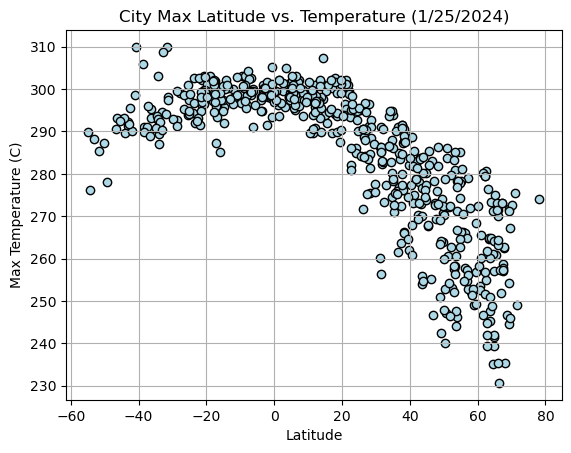

In [16]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude vs. Temperature (1/25/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

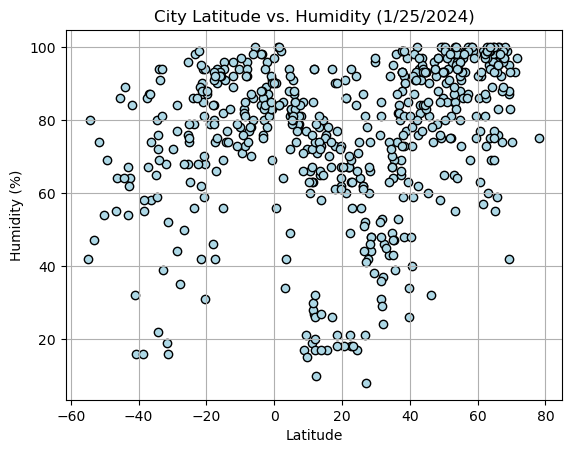

In [17]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity (1/25/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# how to change facecolor of plot ????

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

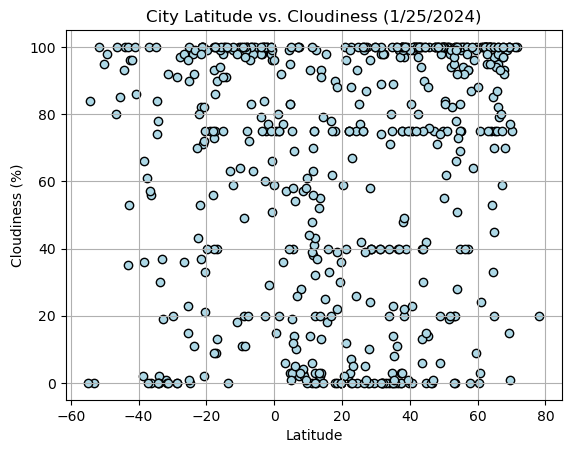

In [18]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness (1/25/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

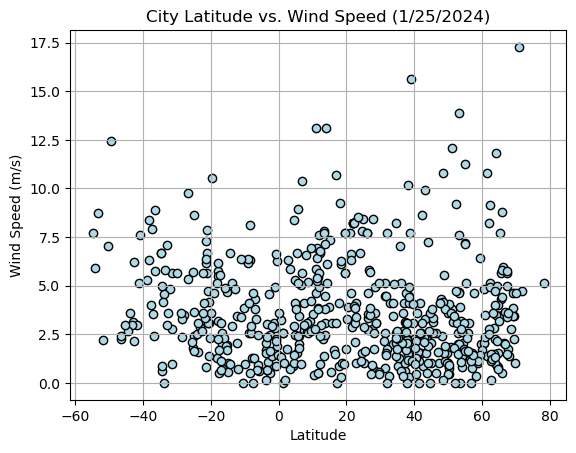

In [19]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed (1/25/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# how to change facecolor of plot ????

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def regression_plot(x, y, y_col, hemi):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="blue", alpha=.5)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(min(x), min(y)),fontsize=15,color="red")
    plt.xlabel("Latitude (" + hemi + ")")
    plt.ylabel(y_col)
    print('The r-value is: ' + str(rvalue ** 2))
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,eyl,7.9803,49.8164,297.39,81,28,6.59,SO,1706223838
5,juhaynah,26.6732,31.4976,284.33,52,5,5.79,EG,1706223840
9,tiksi,71.6872,128.8694,249.13,97,100,4.74,RU,1706223842
11,georgetown,5.4112,100.3354,300.34,91,40,1.54,MY,1706223595
13,sandnessjoen,66.0217,12.6316,271.44,83,82,8.80,NO,1706223793


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,278.06,69,98,12.43,TF,1706223838
2,bredasdorp,-34.5322,20.0403,292.88,80,84,0.60,ZA,1706223838
3,punta arenas,-53.1500,-70.9167,288.21,47,0,8.75,CL,1706223803
4,blackmans bay,-43.0167,147.3167,291.22,54,35,3.13,AU,1706223839
6,waitangi,-43.9535,-176.5597,289.72,89,100,3.58,NZ,1706223840


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6965385975884639


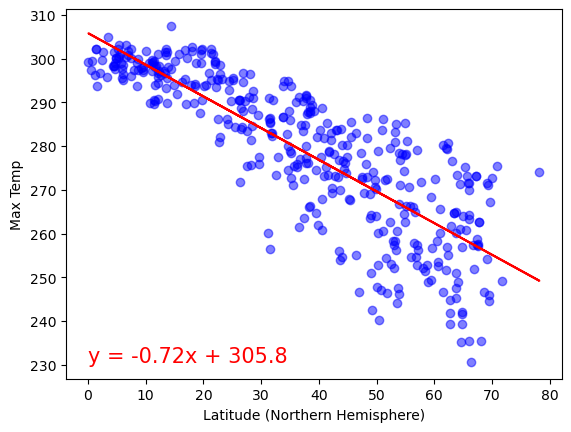

In [24]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', 'Northern Hemisphere')

The r-value is: 0.26334872543002075


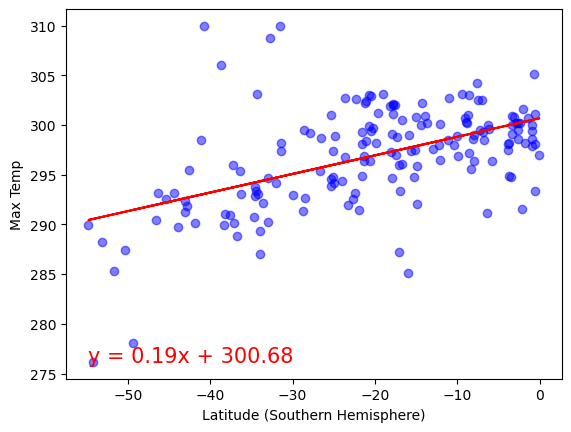

In [25]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', 'Southern Hemisphere')

**Discussion about the linear relationship:** I see a strong negative correlation between latitude and max temperature in the northern hemisphere, and in the southern hemisphere the correlation is positive, but not as strong as the correlation in the northern hemisphere. That means that temperature rises the closer the latitude is to the equator, but once going south of the equator the temperature decline is not as steep as in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.176726309712842


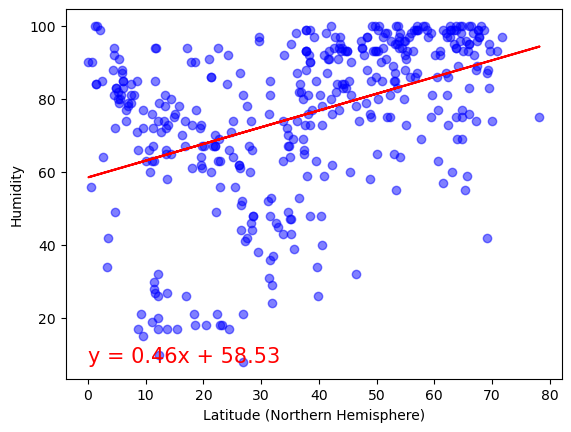

In [26]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', 'Northern Hemisphere')

The r-value is: 0.23082261106595653


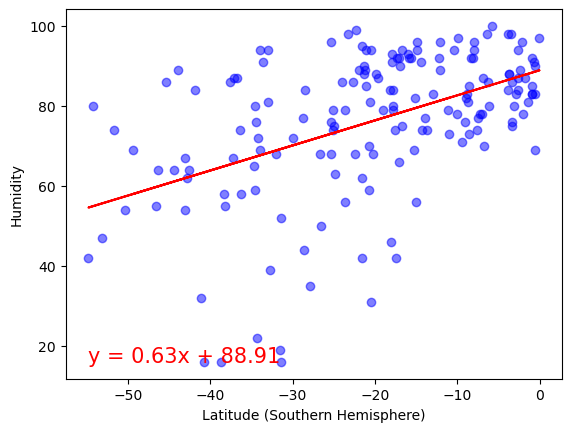

In [27]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', 'Southern Hemisphere')

**Discussion about the linear relationship:** The relationship between humidity and latitude is positive in both hemispheres, but not very strong. The relationship is weaker in the northern hemisphere than the north. The variability in humidity is not as wide nearer the equator as it is further from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14190045949300384


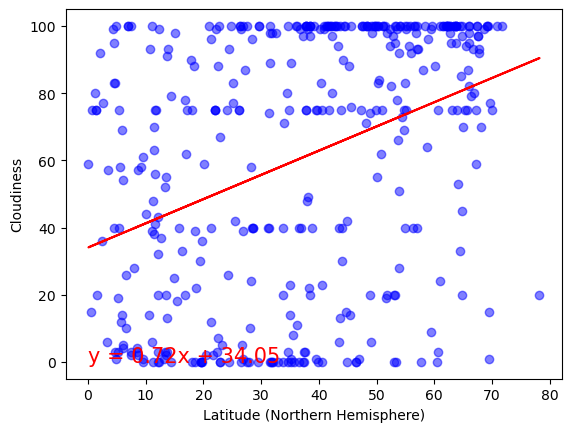

In [28]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 'Northern Hemisphere')

The r-value is: 0.06715202072312754


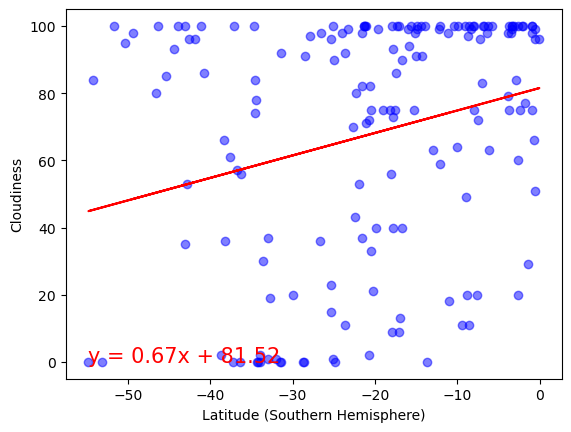

In [29]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', 'Southern Hemisphere')

**Discussion about the linear relationship:** There is a positive correlation between latitude and cloudiness in both hemispheres, but fairly weak. The variability in cloudiness is pretty wide across the globe generally - can be high or low at all latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008506304149894279


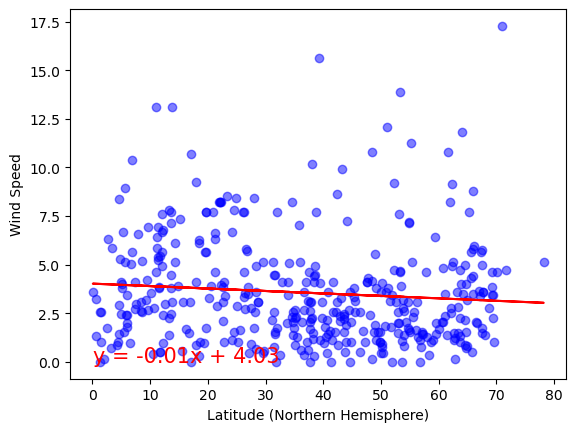

In [30]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 'Northern Hemisphere')

The r-value is: 0.1358484846136284


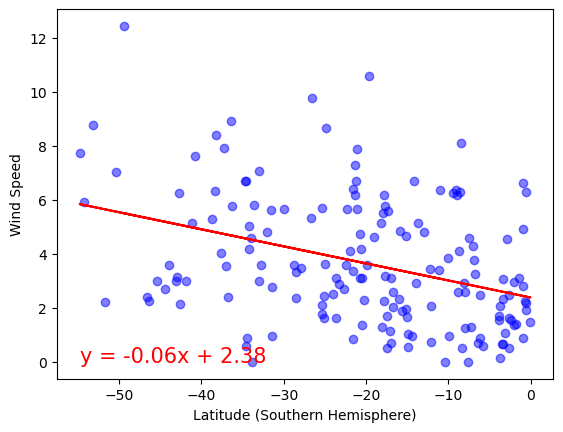

In [31]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', 'Southern Hemisphere')

**Discussion about the linear relationship:** There is a fairly weak negative correlation between latitude and wind speed in the southern hemisphere, and a very veak negative correlation in the northern hemisphere. The wind speed data does not look as high in variability across latitudes as the cloudiness measure did, though in the southern hemisphere there seems to be a more noticeable decline in wind speed as you get closer to the equator.